<a href="https://colab.research.google.com/github/submouse9903/test-1/blob/master/U47768_CH04_modelFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 91464040.33it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27808928.79it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26683738.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3222349.25it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



0


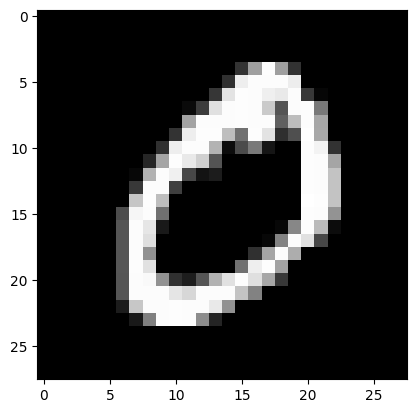

In [ ]:
plt.imshow(train_dataset[1][0][0,:,:], cmap=plt.get_cmap('gray'))
print( train_dataset[1][1] )

In [ ]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train_dataset[0][0].reshape(-1).shape

torch.Size([784])

In [ ]:
n = 50000
p = train_dataset[0][0].reshape(-1).shape.numel()
x = torch.zeros(n,p)
y = torch.zeros((n,), dtype=torch.long)
for i in range(n):
  x[i,:] = train_dataset[i][0].reshape(-1)
  y[i] = int(train_dataset[i][1])

In [ ]:
print( type(x) )
print( type(y) )
y.dtype

<class 'torch.Tensor'>
<class 'torch.Tensor'>


torch.int64

In [ ]:
# Hyper-parameters 
h = 256
output_dim = 10

In [ ]:
model = nn.Sequential(nn.Linear(p,h),
                      nn.ReLU(),
                      nn.Linear(h, h),
                      nn.ReLU(),
                      nn.Linear(h, h),
                      nn.ReLU(),
                      nn.Linear(h, output_dim),
                      nn.Softmax())

In [ ]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
cross_entropy = nn.CrossEntropyLoss()  

In [ ]:
output = model(x)
output[0,:]

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.0927, 0.1049, 0.1009, 0.1059, 0.0993, 0.0989, 0.0933, 0.1048, 0.0989,
        0.1004], grad_fn=<SliceBackward0>)

In [ ]:
num_B = 1000
optimizer.zero_grad()
for i in range(num_B):
  output = model(x)
  loss = cross_entropy(output, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  predicted = torch.max(output.data,1)
  v =((predicted.indices == y).sum()/n ).item()
  if i%100 == 0:
    print ("Accuracy: {:.4f}".format(v))

Accuracy: 0.0986


KeyboardInterrupt: ignored

In [ ]:
n_test = 10000
x_test = torch.zeros(n_test,p)
y_test = torch.zeros((n_test,), dtype=torch.long)
for i in range(n_test):
  x_test[i,:] = train_dataset[i+50000][0].reshape(-1)
  y_test[i] = int(train_dataset[i+50000][1])

In [ ]:
output = model(x_test)
predicted = torch.max(output.data,1)
v =((predicted.indices == y_test).sum()/n_test ).item()
v

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.09910000115633011